In [3]:
import os, shutil

In [2]:
original_tortilla_dir = '/home/dsc/tfm_data/tortilla_de_patata'
original_croquetas_dir = '/home/dsc/tfm_data/croquetas'

In [3]:
!pwd

/home/dsc/TFM_food_recognition


In [5]:
base_dir = '/home/dsc/tfm_data/tortilla_and_croquetas'
#os.mkdir(base_dir)

Creamos los directorios de training, validation y test:

In [6]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

Creamos las carpetas de train, validation y test de cada plato:

In [7]:
train_tortilla_dir = os.path.join(train_dir, 'tortilla')
#os.mkdir(train_tortilla_dir)
train_croquetas_dir = os.path.join(train_dir, 'croquetas')
#os.mkdir(train_croquetas_dir)

In [8]:
validation_tortilla_dir = os.path.join(validation_dir, 'tortilla')
#os.mkdir(validation_tortilla_dir)
validation_croquetas_dir = os.path.join(validation_dir, 'croquetas')
#os.mkdir(validation_croquetas_dir)

In [9]:
test_tortilla_dir = os.path.join(test_dir, 'tortilla')
#os.mkdir(test_tortilla_dir)
test_croquetas_dir = os.path.join(test_dir, 'croquetas')
#os.mkdir(test_croquetas_dir)

Vamos a rellenar los directorios creados anteriormente con las fotos de los platos. Para el caso de las croquetas, vamos a seleccionar un total de 1100 fotos, de las cuales 550 fotos serán para el train, 275 para el validation y 275 para el test.

In [10]:
# Fotos de train:
fotos = os.listdir(original_croquetas_dir)[0:500]
for foto in fotos:
    src = os.path.join(original_croquetas_dir, foto)
    dst = os.path.join(train_croquetas_dir, foto)
    shutil.copyfile(src, dst)

In [11]:
# Fotos de validation:
fotos = os.listdir(original_croquetas_dir)[500:750]
for foto in fotos:
    src = os.path.join(original_croquetas_dir, foto)
    dst = os.path.join(validation_croquetas_dir, foto)
    shutil.copyfile(src, dst)

In [12]:
# Fotos de test:
fotos = os.listdir(original_croquetas_dir)[750:1000]
for foto in fotos:
    src = os.path.join(original_croquetas_dir, foto)
    dst = os.path.join(test_croquetas_dir, foto)
    shutil.copyfile(src, dst)

Para las tortillas de patata hemos seleccionado 1200 imágenes. Para el set de train se usarán 600 imágenes y para los set de validation y test serán 300 fotos respectivamente.

In [13]:
# Fotos de train:
fotos = os.listdir(original_tortilla_dir)[0:500]
for foto in fotos:
    src = os.path.join(original_tortilla_dir, foto)
    dst = os.path.join(train_tortilla_dir, foto)
    shutil.copyfile(src, dst)

In [14]:
# Fotos de validation:
fotos = os.listdir(original_tortilla_dir)[500:750]
for foto in fotos:
    src = os.path.join(original_tortilla_dir, foto)
    dst = os.path.join(validation_tortilla_dir, foto)
    shutil.copyfile(src, dst)

In [15]:
# Fotos de test:
fotos = os.listdir(original_tortilla_dir)[750:1000]
for foto in fotos:
    src = os.path.join(original_tortilla_dir, foto)
    dst = os.path.join(test_tortilla_dir, foto)
    shutil.copyfile(src, dst)

Una vez preparadas las fotos en sus respectivos directorios, vamos a realizar una pequeña convnet:

In [23]:
from keras import layers
from keras import models

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Configuramos el modelo para el training;

In [26]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Using <code>ImageDataGenerator</code> para leer las imágeenes de los directorios:

### Correr el modelo una vez realizada la configuración de directorios:

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) # reescalar las imagenes por 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
base_dir = '/home/dsc/tfm_data/tortilla_and_croquetas'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_dir

'/home/dsc/tfm_data/tortilla_and_croquetas/train'

In [6]:
train_generator =train_datagen.flow_from_directory(
        train_dir, # directorio objetivo
        target_size=(150,150), # rescalamos las imagenes a 150 x 150
        batch_size=20,
        class_mode='binary' # hemos usado binary_crossentropy, por lo que necesitamos etiquetas binary
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary'
)


Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Visualizamos las etiquetas asignadas a cada plato:

In [8]:
train_generator.class_indices

{'croquetas': 0, 'tortilla': 1}

Ajustando el modelo con un batch generator:

In [29]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator, 
    validation_steps=25)

/home/dsc/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 29s 556ms/step - loss: 0.6755 - acc: 0.5776 - val_loss: 0.7038 - val_acc: 0.5420
Epoch 2/30
50/50 [==============================] - 26s 519ms/step - loss: 0.5632 - acc: 0.7185 - val_loss: 0.5000 - val_acc: 0.7700
Epoch 3/30
50/50 [==============================] - 27s 533ms/step - loss: 0.5271 - acc: 0.7241 - val_loss: 0.5557 - val_acc: 0.7100
Epoch 4/30
50/50 [==============================] - 31s 614ms/step - loss: 0.5160 - acc: 0.7545 - val_loss: 0.5917 - val_acc: 0.6880
Epoch 5/30
50/50 [==============================] - 32s 649ms/step - loss: 0.4738 - acc: 0.8017 - val_loss: 0.4640 - val_acc: 0.7920
Epoch 6/30
50/50 [==============================] - 31s 623ms/step - loss: 0.4163 - acc: 0.7981 - val_loss: 0.4338 - val_acc: 0.8040
Epoch 7/30
50/50 [==============================] - 30s 603ms/step - loss: 0.4136 - acc: 0.7933 - val_loss: 0.4233 - val_acc: 0.8040
Epoch 8/30
50/50 [==============================] - 30s 603ms/step - 

Consideremos una buena práctica guardar nuestro modelo:

In [26]:
%cd ../tfm_data/

/home/dsc/tfm_data


In [27]:
!pwd

/home/dsc/tfm_data


In [28]:
model.save('croquetas_and_tortilla_1.h5')

In [29]:
%cd ../TFM_food_recognition/

/home/dsc/TFM_food_recognition


In [20]:
import matplotlib.pyplot as plt

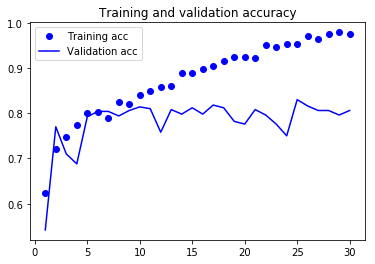

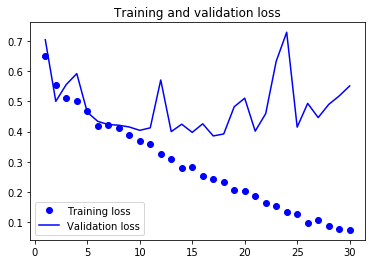

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
val_acc

[0.7234782576560974]

### Data Augmentation: 

In [14]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [15]:
from keras.preprocessing import image

In [16]:
fnames = [os.path.join(train_croquetas_dir, fname) for fname in os.listdir(train_croquetas_dir)]

In [17]:
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))

In [18]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

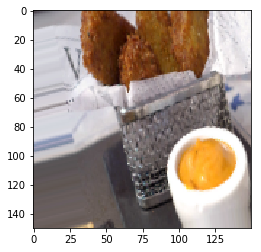

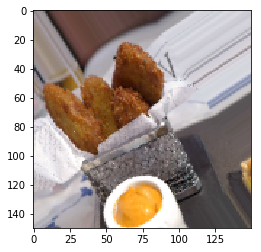

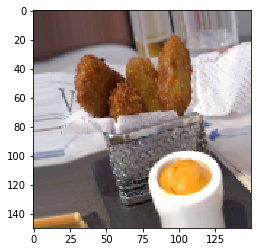

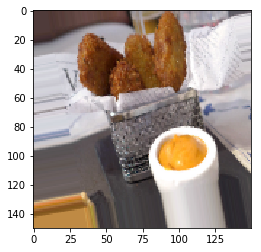

In [21]:
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

'/home/dsc/tfm_data/tortilla_and_croquetas/train/croquetas/18078228192_679be618d1_c.jpg'

In [27]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [29]:
# Validation data no se realiza la transoformación de las imágenes:
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.


In [35]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=25)

Epoch 1/100
50/50 [==============================] - 35s 699ms/step - loss: 0.6471 - acc: 0.6460 - val_loss: 0.6474 - val_acc: 0.5880
Epoch 2/100
50/50 [==============================] - 35s 707ms/step - loss: 0.5948 - acc: 0.6850 - val_loss: 0.5648 - val_acc: 0.7080
Epoch 3/100
50/50 [==============================] - 35s 695ms/step - loss: 0.5388 - acc: 0.7390 - val_loss: 0.8435 - val_acc: 0.5440
Epoch 4/100
50/50 [==============================] - 37s 736ms/step - loss: 0.5194 - acc: 0.7550 - val_loss: 0.4445 - val_acc: 0.7940
Epoch 5/100
50/50 [==============================] - 28s 552ms/step - loss: 0.5139 - acc: 0.7510 - val_loss: 0.4432 - val_acc: 0.7940
Epoch 6/100
50/50 [==============================] - 28s 552ms/step - loss: 0.4880 - acc: 0.7660 - val_loss: 0.4507 - val_acc: 0.7820
Epoch 7/100
50/50 [==============================] - 29s 569ms/step - loss: 0.4859 - acc: 0.7670 - val_loss: 0.4851 - val_acc: 0.7800
Epoch 8/100
50/50 [==============================] - 28s 564ms

In [36]:
!pwd

/home/dsc/TFM_food_recognition


In [37]:
%cd ../tfm_data/

/home/dsc/tfm_data


In [38]:
# GUardamos de nuevo el modelo:
model.save('croquetas_and_tortilla_2.h5')

In [39]:
%cd ../TFM_food_recognition/

/home/dsc/TFM_food_recognition


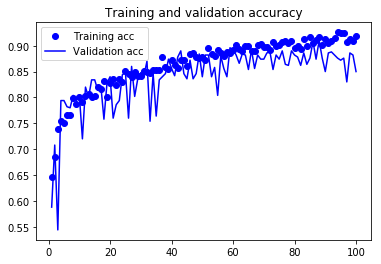

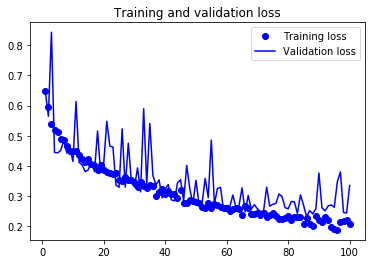

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()